In [ ]:
import requests

# First, get the CSRF token
session = requests.Session()
response = session.get('https://example.com/form_page')  # Replace with your URL

# Assuming the token is stored in cookies or HTML
csrf_token = session.cookies.get('_xsrf')  # Or parse HTML if it's embedded

# Now, make the POST request with the CSRF token
post_data = {'key': 'value', '_xsrf': csrf_token}
headers = {'X-CSRFToken': csrf_token}  # Depending on the server requirements

post_response = session.post('https://example.com/submit', data=post_data, headers=headers)


In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve


In [2]:
loan_data = pd.read_csv('C:/Users/HP/Downloads/lc_2016_2017/lending.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_10068\3192277778.py:1: DtypeWarning: Columns (18,54) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('C:/Users/HP/Downloads/lc_2016_2017/lending.csv')


In [3]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300.0,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000.0,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025.0,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400.0,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000.0,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759333,65854936,NaN,6000,6000,6000.0,36 months,7.89,187.72,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,21400.0,NaN,NaN,NaN
759334,66055600,NaN,6000,6000,6000.0,36 months,9.17,191.28,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,18600.0,NaN,NaN,NaN
759335,66141895,NaN,14400,14400,14400.0,60 months,13.18,328.98,C,C3,...,NaN,NaN,NaN,NaN,NaN,NaN,18300.0,NaN,NaN,NaN
759336,65673209,NaN,34050,34050,34050.0,36 months,15.41,1187.21,D,D1,...,NaN,NaN,NaN,NaN,NaN,NaN,47900.0,NaN,NaN,NaN


In [4]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759338 entries, 0 to 759337
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           759338 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    759338 non-null  int64  
 3   funded_amnt                  759338 non-null  int64  
 4   funded_amnt_inv              759338 non-null  float64
 5   term                         759338 non-null  object 
 6   int_rate                     759338 non-null  float64
 7   installment                  759338 non-null  float64
 8   grade                        759338 non-null  object 
 9   sub_grade                    759338 non-null  object 
 10  emp_title                    708368 non-null  object 
 11  emp_length                   708975 non-null  object 
 12  home_ownership               759338 non-null  object 
 13 

## TARGET VARIABLE

In [5]:
loan_data.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [6]:
 loan_data['good_bad'] = np.where(loan_data.loc[:,'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)'])
                                 , 1, 0)

In [7]:
loan_data.good_bad.value_counts()

0    702875
1     56463
Name: good_bad, dtype: int64

In [8]:
loan_data[['loan_status', 'good_bad']]

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
759333,Current,0
759334,Current,0
759335,Late (16-30 days),1
759336,Current,0


## MISSING VALUE

In [9]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])

In [10]:
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]

In [11]:
missing_values.sort_values([0], ascending=False)

,0
member_id,1.000000
desc,0.999978
dti_joint,0.955223
annual_inc_joint,0.955220
verification_status_joint,0.955220
mths_since_last_record,0.814076
mths_since_last_major_derog,0.716720


In [12]:
loan_data.dropna(thresh = loan_data.shape[0]*0.5, how='all', axis=1, inplace=True)

In [13]:
missing_values = pd.DataFrame(loan_data.isnull().sum()/loan_data.shape[0])
missing_values = missing_values[missing_values.iloc[:,0] > 0.50]
missing_values.sort_values([0], ascending=False)

,0


## DATA SPLITTING  

In [14]:
loan_data.shape

(759338, 66)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#80% Data Train % 20% Data Test
X = loan_data.drop('good_bad', axis=1)
y = loan_data['good_bad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
X_train.shape, X_test.shape

((607470, 65), (151868, 65))

In [18]:
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

0    0.925639
1    0.074361
Name: good_bad, dtype: float64

Y_TRAIN DAN Y_TEST IMBALANCE KARENA JUMLAH 1 / GOOD SANGAT SEDIKIT

#TAPI Y_TRAIN DAN Y_TEST SUDAH MEMILIKI DISTRIBUSI YG SAMA 92-07

JIKA BELUM SAMA, BISA DITAMBAH "STRATIFY"

# DATA CLEANING

In [20]:
X_train.shape

(607470, 65)

In [21]:
#Melihat kolom non numerik
X_train.select_dtypes(include = ['object', 'bool'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
147577,36 months,C,C1,Administrative assistant,4 years,MORTGAGE,Source Verified,Feb-2017,Current,n,debt_consolidation,Debt consolidation,582xx,ND,Aug-1994,w,Dec-2017,Jan-2018,Dec-2017,Individual
505776,36 months,A,A1,director of workforce development,10+ years,RENT,Source Verified,Apr-2016,Fully Paid,n,debt_consolidation,Debt consolidation,112xx,NY,Sep-2001,w,Jul-2017,NaN,Nov-2017,Individual
412425,36 months,B,B1,Nanny,< 1 year,RENT,Not Verified,Jul-2017,Current,n,credit_card,Credit card refinancing,112xx,NY,May-1999,w,Dec-2017,Jan-2018,Dec-2017,Individual
618730,36 months,B,B5,QA Software Analyst,5 years,RENT,Source Verified,Oct-2016,Current,n,credit_card,Credit card refinancing,840xx,UT,Jun-2005,w,Dec-2017,Jan-2018,Dec-2017,Individual
111143,36 months,C,C1,Supervisor,6 years,RENT,Source Verified,Mar-2017,Current,n,debt_consolidation,Debt consolidation,334xx,FL,Jan-2012,w,Dec-2017,Jan-2018,Dec-2017,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150426,36 months,A,A4,Construction Superintendent,8 years,MORTGAGE,Source Verified,Feb-2017,Fully Paid,n,other,Other,913xx,CA,Nov-1998,w,Nov-2017,NaN,Dec-2017,Individual
195135,36 months,B,B2,NaN,NaN,RENT,Verified,Jan-2017,Current,n,home_improvement,Home improvement,320xx,FL,Sep-1993,f,Dec-2017,Jan-2018,Dec-2017,Individual
182511,36 months,A,A3,Aquatics Manager,10+ years,MORTGAGE,Not Verified,Jan-2017,Current,n,home_improvement,Home improvement,988xx,WA,Mar-1988,w,Dec-2017,Jan-2018,Dec-2017,Joint App
82596,36 months,C,C3,making plant planner,3 years,MORTGAGE,Verified,Apr-2017,Current,n,debt_consolidation,Debt consolidation,121xx,NY,Jan-2003,w,Dec-2017,Jan-2018,Dec-2017,Individual


In [22]:
for col in X_train.select_dtypes(include = ['object', 'bool']).columns:
    print(col)
    print(X_train[col].unique())
    print()

term
['36 months' '60 months']

grade
['C' 'A' 'B' 'E' 'D' 'G' 'F']

sub_grade
['C1' 'A1' 'B1' 'B5' 'A4' 'E2' 'A5' 'D1' 'C4' 'C3' 'G3' 'D3' 'E1' 'C5'
 'D2' 'C2' 'A2' 'E3' 'D5' 'E4' 'B2' 'F2' 'B4' 'A3' 'D4' 'B3' 'F1' 'F5'
 'G2' 'E5' 'F3' 'G1' 'G5' 'F4' 'G4']

emp_title
['Administrative assistant' 'director of workforce development' 'Nanny'
 ... 'Operations Planning Manager' 'Sr. xPression Developer'
 'making plant planner']

emp_length
['4 years' '10+ years' '< 1 year' '5 years' '6 years' '7 years' '2 years'
 '3 years' '8 years' '1 year' nan '9 years']

home_ownership
['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE']

verification_status
['Source Verified' 'Not Verified' 'Verified']

issue_d
['Feb-2017' 'Apr-2016' 'Jul-2017' 'Oct-2016' 'Mar-2017' 'May-2016'
 'Mar-2016' 'Aug-2017' 'Jul-2016' 'Jan-2017' 'Sep-2016' 'Aug-2016'
 'Nov-2016' 'Dec-2016' 'Jun-2016' 'Sep-2017' 'Feb-2016' 'May-2017'
 'Jun-2017' 'Apr-2017' 'Jan-2016']

loan_status
['Current' 'Fully Paid' 'Late (16-30 days)' 'Charged Off'
 'La

In [23]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

In [24]:
X_train['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [25]:
pd.to_numeric(X_train['term'].str.replace('months', ' '))

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [26]:
X_train['term'] = pd.to_numeric(X_train['term'].str.replace('months', ' '))

In [27]:
X_train['term']

147577    36
505776    36
412425    36
618730    36
111143    36
          ..
150426    36
195135    36
182511    36
82596     36
165904    36
Name: term, Length: 607470, dtype: int64

In [28]:
X_train['emp_length'].unique()

array(['4 years', '10+ years', '< 1 year', '5 years', '6 years',
       '7 years', '2 years', '3 years', '8 years', '1 year', nan,
       '9 years'], dtype=object)

In [29]:
X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('< 1 year', str(0))
X_train['emp_length'] = X_train['emp_length'].str.replace(' years', '')
X_train['emp_length'] = X_train['emp_length'].str.replace('year', '')
X_train['emp_length'].fillna(value = 0, inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10068\2988314720.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train['emp_length'] = X_train['emp_length'].str.replace('\+ years', '')


In [30]:
X_train['emp_length']

147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904    1 
Name: emp_length, Length: 607470, dtype: object

In [31]:
X_train['emp_length'] = pd.to_numeric(X_train['emp_length'])

In [32]:
X_train['emp_length']

147577     4
505776    10
412425     0
618730     5
111143     6
          ..
150426     8
195135     0
182511    10
82596      3
165904     1
Name: emp_length, Length: 607470, dtype: int64

In [33]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,Feb-2017,Aug-1994,Dec-2017,Jan-2018,Dec-2017
505776,Apr-2016,Sep-2001,Jul-2017,NaN,Nov-2017
412425,Jul-2017,May-1999,Dec-2017,Jan-2018,Dec-2017
618730,Oct-2016,Jun-2005,Dec-2017,Jan-2018,Dec-2017
111143,Mar-2017,Jan-2012,Dec-2017,Jan-2018,Dec-2017
...,...,...,...,...,...
150426,Feb-2017,Nov-1998,Nov-2017,NaN,Dec-2017
195135,Jan-2017,Sep-1993,Dec-2017,Jan-2018,Dec-2017
182511,Jan-2017,Mar-1988,Dec-2017,Jan-2018,Dec-2017
82596,Apr-2017,Jan-2003,Dec-2017,Jan-2018,Dec-2017


In [34]:
pd.to_datetime(X_train['issue_d'])

147577   2017-02-01
505776   2016-04-01
412425   2017-07-01
618730   2016-10-01
111143   2017-03-01
            ...    
150426   2017-02-01
195135   2017-01-01
182511   2017-01-01
82596    2017-04-01
165904   2017-02-01
Name: issue_d, Length: 607470, dtype: datetime64[ns]

In [35]:
for col in col_date:
    X_train[col] = pd.to_datetime(X_train[col])

In [36]:
X_train[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
147577,2017-02-01,1994-08-01,2017-12-01,2018-01-01,2017-12-01
505776,2016-04-01,2001-09-01,2017-07-01,NaT,2017-11-01
412425,2017-07-01,1999-05-01,2017-12-01,2018-01-01,2017-12-01
618730,2016-10-01,2005-06-01,2017-12-01,2018-01-01,2017-12-01
111143,2017-03-01,2012-01-01,2017-12-01,2018-01-01,2017-12-01
...,...,...,...,...,...
150426,2017-02-01,1998-11-01,2017-11-01,NaT,2017-12-01
195135,2017-01-01,1993-09-01,2017-12-01,2018-01-01,2017-12-01
182511,2017-01-01,1988-03-01,2017-12-01,2018-01-01,2017-12-01
82596,2017-04-01,2003-01-01,2017-12-01,2018-01-01,2017-12-01


In [37]:
X_test['term'] = pd.to_numeric(X_test['term'].str.replace('months', ' '))
X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('< 1 year', str(0))
X_test['emp_length'] = X_test['emp_length'].str.replace(' years', '')
X_test['emp_length'] = X_test['emp_length'].str.replace('year', '')
X_test['emp_length'].fillna(value = 0, inplace=True)
X_test['emp_length'] = pd.to_numeric(X_test['emp_length'])
for col in col_date:
    X_test[col] = pd.to_datetime(X_test[col])

C:\Users\HP\AppData\Local\Temp\ipykernel_10068\1560929348.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  X_test['emp_length'] = X_test['emp_length'].str.replace('\+ years', '')


In [38]:
X_test[col_need_to_clean].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151868 entries, 280647 to 267584
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   term                151868 non-null  int64         
 1   emp_length          151868 non-null  int64         
 2   issue_d             151868 non-null  datetime64[ns]
 3   earliest_cr_line    151868 non-null  datetime64[ns]
 4   last_pymnt_d        151655 non-null  datetime64[ns]
 5   next_pymnt_d        118276 non-null  datetime64[ns]
 6   last_credit_pull_d  151867 non-null  datetime64[ns]
dtypes: datetime64[ns](5), int64(2)
memory usage: 9.3 MB


# FEATURE ENGINEERING

In [39]:
col_need_to_clean

['term',
 'emp_length',
 'issue_d',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d']

In [40]:
X_train = X_train[col_need_to_clean]
X_test = X_test[col_need_to_clean]

In [41]:
del X_train['next_pymnt_d']
del X_test['next_pymnt_d']

In [42]:
from datetime import date
date.today().strftime('%Y-%m-%d')

'2024-11-10'

In [54]:
def date_columns(df, column):
    today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
    df[column] = pd.to_datetime(df[column], format = "%b-%y")
    df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
    df.drop(columns = [column], inplace=True)
    
# apply to X_train
date_columns(X_train, 'earliest_cr_line')
date_columns(X_train, 'issue_d')
date_columns(X_train, 'last_pymnt_d')
date_columns(X_train, 'last_credit_pull_d')

In [55]:
# apply to X_test
date_columns(X_test, 'earliest_cr_line')
date_columns(X_test, 'issue_d')
date_columns(X_test, 'last_pymnt_d')
date_columns(X_test, 'last_credit_pull_d')

In [56]:
X_test.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          213
mths_since_last_credit_pull_d      1
dtype: int64

In [57]:
X_train.isnull().sum()

term                               0
emp_length                         0
mths_since_earliest_cr_line        0
mths_since_issue_d                 0
mths_since_last_pymnt_d          735
mths_since_last_credit_pull_d     17
dtype: int64

In [58]:
X_train.fillna(X_train.median(), inplace=True)
X_test.fillna(X_test.median(), inplace=True)

In [47]:
pd.to_datetime(date.today().strftime('%Y-%m-%d')) - pd.to_datetime('2017-02-01')

Timedelta('2839 days 00:00:00')

# Modelling

In [60]:
model = LogisticRegression()

In [61]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
result = pd.DataFrame(list(zip(y_pred,y_test)), columns = ['y_pred', 'y_test'])
result.head()

,y_pred,y_test
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0


In [63]:
accuracy_score(y_test, y_pred)

0.9173163536755603

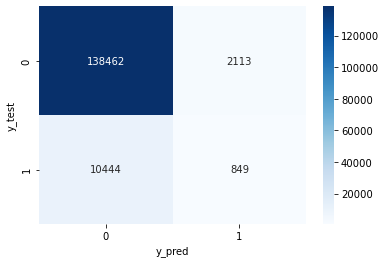

In [65]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [66]:
y_train.value_counts(normalize=True)

0    0.925642
1    0.074358
Name: good_bad, dtype: float64

In [67]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
# memprediksi probability dan mengambil probability kelas positive
y_pred = model.predict_proba(X_test)[:, 1]

In [69]:
y_pred

array([0.22546872, 0.02482828, 0.01040891, ..., 0.00885368, 0.06500042,
       0.03704965])

In [70]:
(y_pred > 0.5).astype(int)

array([0, 0, 0, ..., 0, 0, 0])

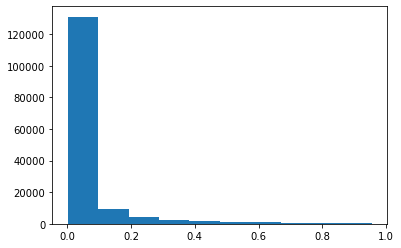

In [71]:
# distribusi predicted probability
plt.hist(y_pred);

In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [73]:
# youden j-statistic
j = tpr - fpr

ix = np.argmax(j)

best_thresh = thresholds[ix]
best_thresh

0.06644356444046168

In [74]:
y_pred = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred > 0.066).astype(int)

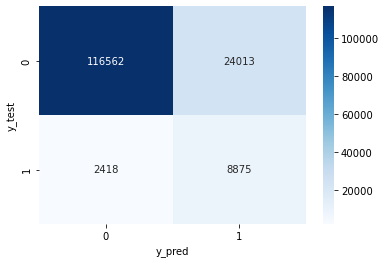

In [75]:
cm = confusion_matrix(y_test, y_pred)


sns.heatmap(cm, annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel('y_pred')
plt.ylabel('y_test')

plt.show()

In [76]:
model.coef_

array([[ 0.01727662, -0.03155993, -0.00103513,  0.04583395,  0.23474097,
        -0.15286683]])

In [77]:
model.intercept_

array([-14.66667119])

In [78]:
df_coeff = pd.DataFrame(model.coef_, columns=X_train.columns)
df_coeff

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
0,0.017277,-0.03156,-0.001035,0.045834,0.234741,-0.152867


In [79]:
X_train.head()

,term,emp_length,mths_since_earliest_cr_line,mths_since_issue_d,mths_since_last_pymnt_d,mths_since_last_credit_pull_d
147577,36,4,363.0,93.0,83.0,83.0
505776,36,10,278.0,103.0,88.0,84.0
412425,36,0,306.0,88.0,83.0,83.0
618730,36,5,233.0,97.0,83.0,83.0
111143,36,6,154.0,92.0,83.0,83.0
